In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Extraction by Rita
- Reads the CSV file into a pandas DataFrame.
- Previews the dataset using `.head()` and `.info()` to understand its structure.
- Checks for data quality issues like:
  - Missing values (`.isnull().sum()`)
  - Duplicate rows (`.duplicated().sum()`)



In [15]:
# ETL Extract by Rita
import pandas as pd

# Load dataset
df = pd.read_csv('cybersecurity_intrusion_data.csv')

# Preview data
print("Cybersecurity Intrusion Data Preview:")
display(df.head())
df.info()

# Observations
print("\nObservations:")
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Cybersecurity Intrusion Data Preview:


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB

Observations:
Missing values:
 session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encrypt

### Transformation by Hetal

Structrutal: 

- Convert dates 

- Change data types

- Consistent case 


In [ ]:
# Displaying the data type for each column - Hetal
print(f"The data types are: \n {df.dtypes} \n")

''' 
- Since there are no dates, there is no need for covnersion.
- Each column has the correct data type as seen in the output below thus no change required.
'''


The data types are: 
 session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object 



In [ ]:
# Ensuring consistent casing - Hetal

# Converting 'protocol_type' (TCP, UDP, ICMP) to upper case
df['protocol_type'] = df['protocol_type'].str.upper()

# Checking if the text is in upper case
print(df['protocol_type'])

''' 
As seen in the output, the text in 'protocol_type' is now in a consistent case (upper case)
'''


0        TCP
1        TCP
2        TCP
3        UDP
4        TCP
        ... 
9532    ICMP
9533     TCP
9534     TCP
9535     TCP
9536     TCP
Name: protocol_type, Length: 9537, dtype: object


Cleaning:

- Handle missing values

- Remove duplicates

Explanation:

    Handling missing values is essnetial to avoid errors during analysis. Therefore, filled the only column  with missing values with 'No Data'.

    If they were duplicates, they would have been removed to ensure data integrity.

In [13]:
# Checking for missing values in each column - Hetal
missing_values = df.isnull().sum()
print(f"The number of missing values are: \n {missing_values} \n")

# Filling missing values
df['encryption_used'] = df['encryption_used'].fillna("No Data")

# Confirming for missing values in each column
missing_values_after = df.isnull().sum()
print(f"The number of missing values are: \n {missing_values_after} \n")


The number of missing values are: 
 session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64 

The number of missing values are: 
 session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64 



In [ ]:
# Checking for duplicate records - Hetal
duplicates = df.duplicated().sum()
print(f"The number of duplicate rows include: \n {duplicates} \n")

''' 
- As seen there are zero duplicates thus no removal required.
'''

The number of duplicate rows include: 
 0 



Handling Outliers: 

Outliers can skew analysis and lead to incorrect conclusions.



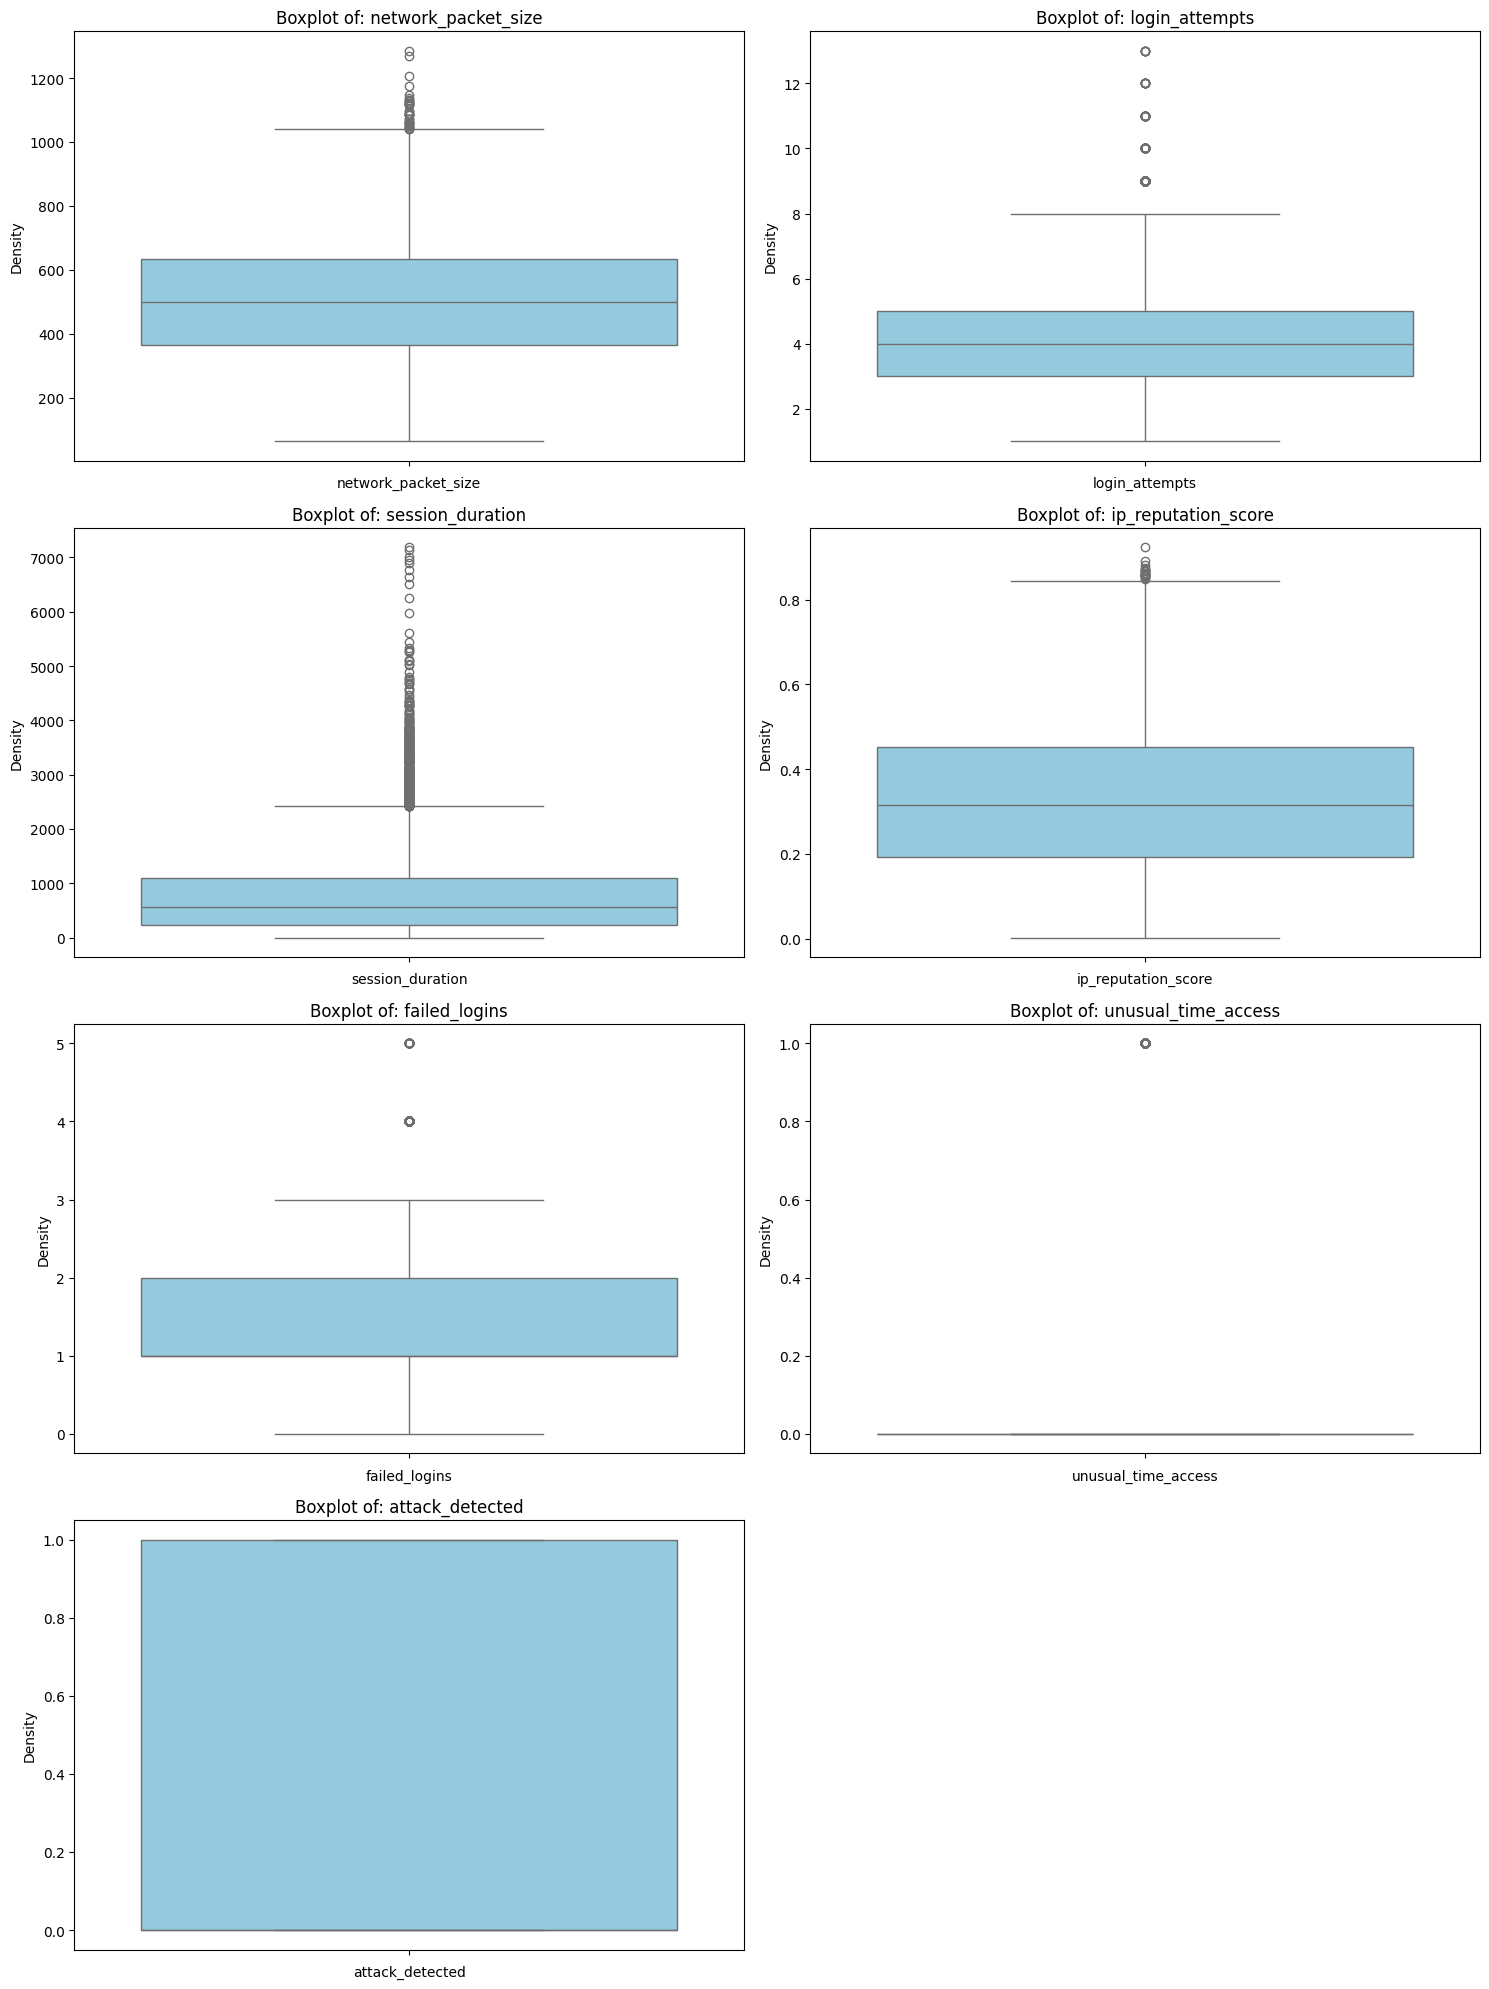

In [16]:
# Identify outliers using boxplots - Hetal

# Select columns with numeric data types (integers and floats)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Setting the no. of rows and columns for subplots
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 

# Initializez a new figure for plotting
plt.figure(figsize=(15, num_rows * 5))

# Creating box plots for each numeric column
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.boxplot (df[column], color='skyblue')
    plt.title(f"Boxplot of: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout() # adjusts the spacing and prevents overlap
plt.show()



Insights:

- 'network_packet_size':

    - Represents the size of network packets, ranging between **64 to 1500 bytes**.

    - Attackers may use abnormally **small or large packets** for reconnaissance or exploitation attempts, thus the outliers are kept.

- 'login_attempts':

    - High values might indicate **brute-force attacks** (repeated login attempts).

    - Typical users have 1–3 login attempts, while an attack may have hundreds or thousands, therefore the outliers are kept.

- 'session_duration':

    - A very long session might indicate unauthorized access or persistence by an attacker.

    - Attackers may try to stay connected to maintain access.

    - Thus the outliers are kept.

- 'ip_reputation_score':

    - A score from 0 to 1, where higher values indicate suspicious activity.

    - IP addresses associated with botnets, spam, or previous attacks tend to have higher scores.

    - Thus the outliers are kept.

- 'failed_logins':

    - Many failed attempts followed by a successful login could suggest an account was compromised.

    - Thus the outliers are kept.

- 'unusual_time_access': 

    - Attackers often operate outside normal business hours to evade detection.

    - Thus the outliers are kept.

- 'attack_detected': 

    - Has no outliers.

- As seen, attacks typically occur at the outliers, thus they are kept to aid in analysis and predicting furture attacks.

In [17]:
# Saving transformed 'cybersecurity_intrusion_data.csv'
df.to_csv('data/transformed/transformed_cybersecurity_intrusion_data.csv', index=False)